# tracking the detected pupil: visual inspection of the results



In [58]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Using 42 frames recorded with 2015-11-05 notebook


In [59]:
import cv2
import os

N_frame = 42

folder = '/tmp/debug'
H, W, three = cv2.imread(os.path.join(folder, 'frame_1.png')).shape

movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)

for i in range(N_frame):
    fname = 'frame_{i}.png'.format(i=i)
    movie[:, :, :, i] = cv2.cvtColor(cv2.imread(os.path.join(folder, fname)), cv2.COLOR_BGR2RGB)


(720, 1280, 3, 42) 0 255


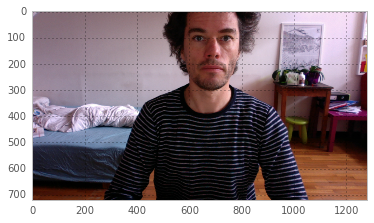

In [60]:
print(movie.shape, movie.min(), movie.max())
plt.imshow(movie[:, :, :, 0])

## Using the package

/usr/local/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


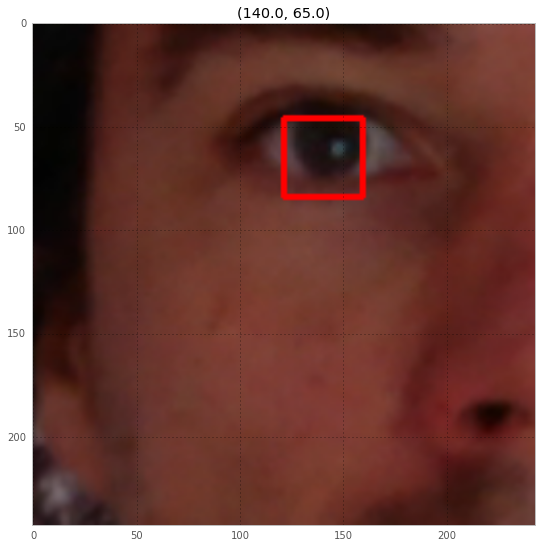

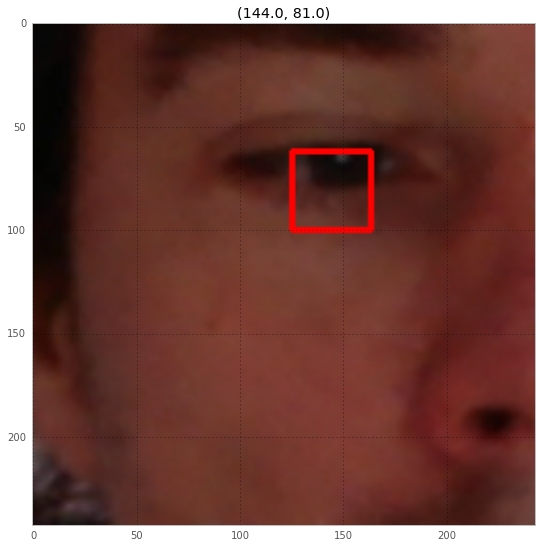

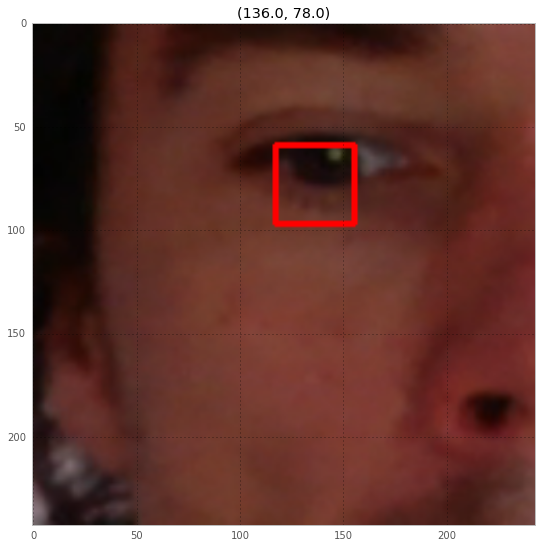

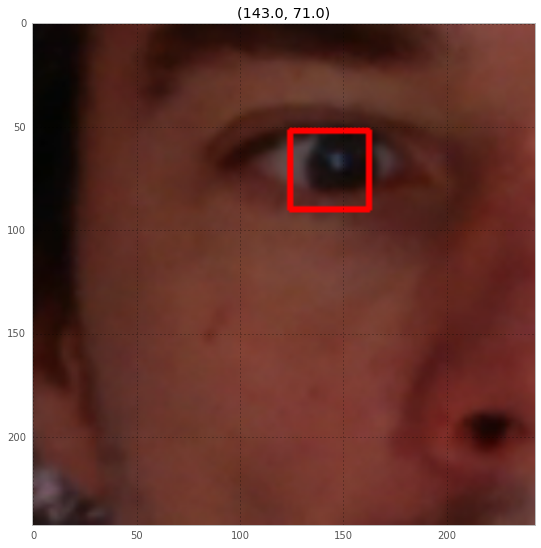

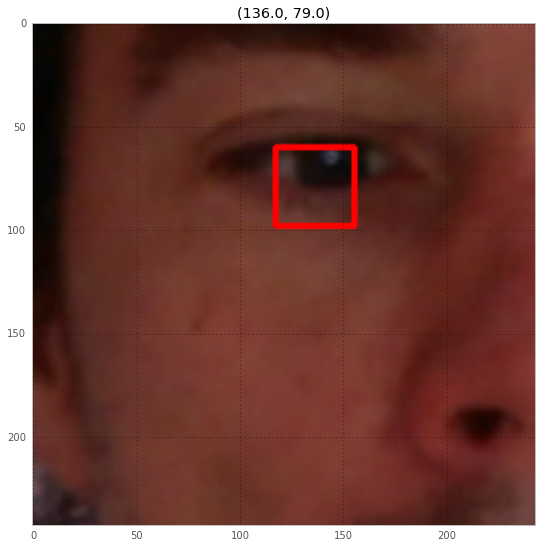

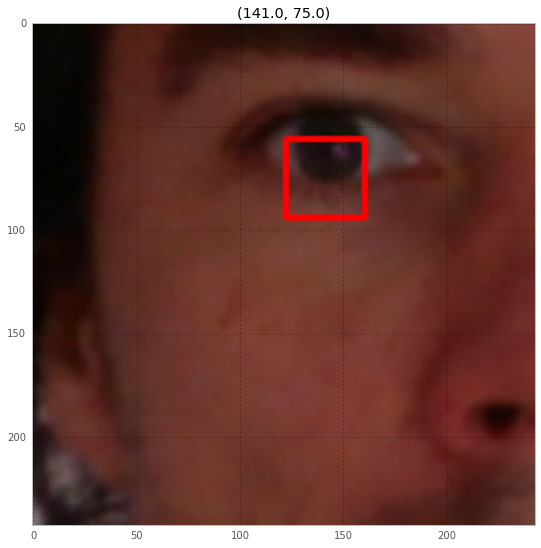

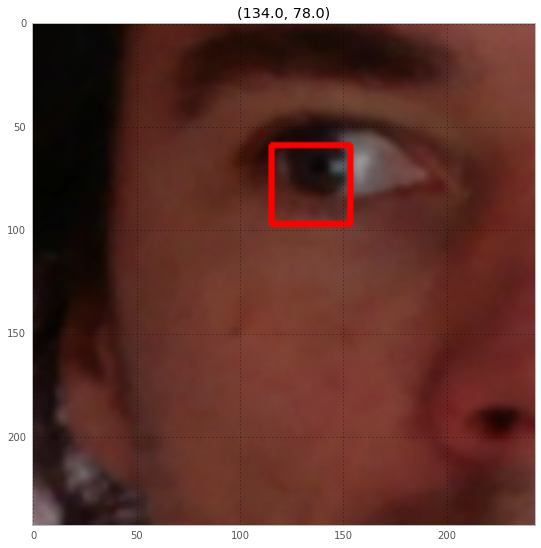

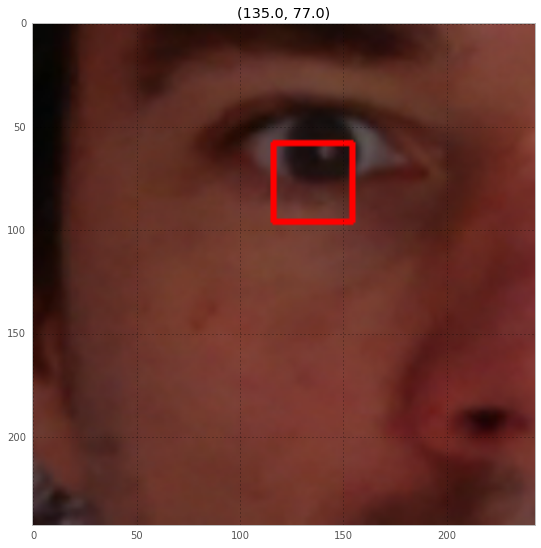

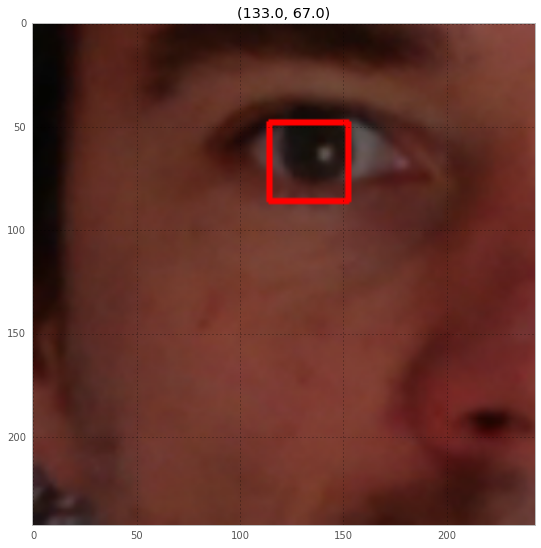

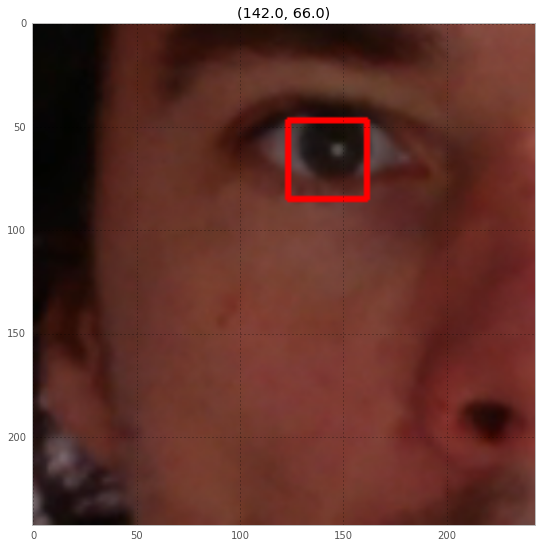

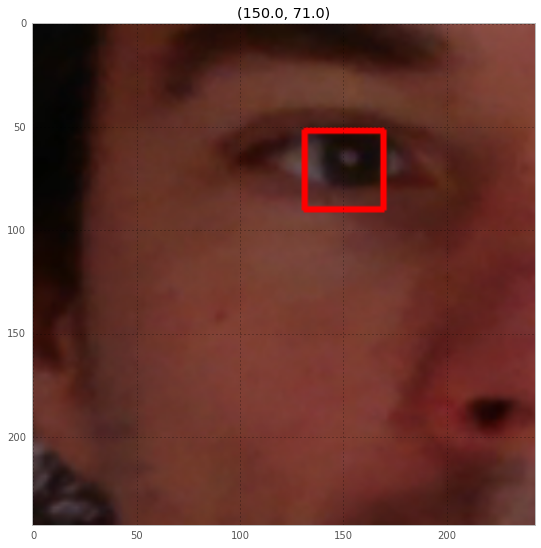

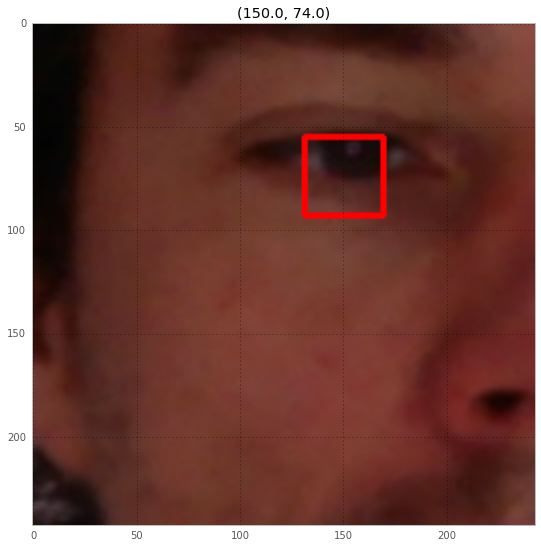

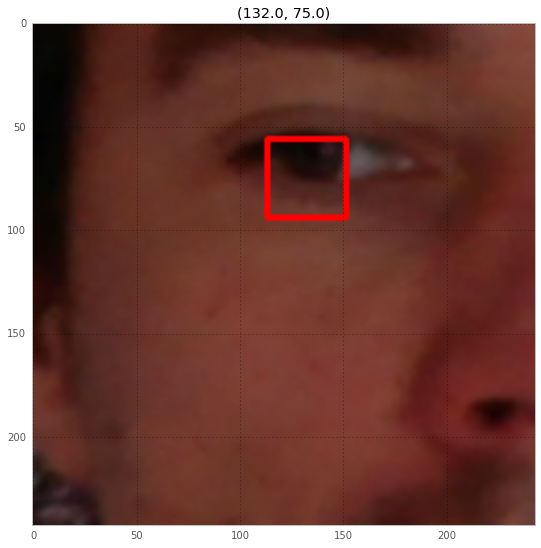

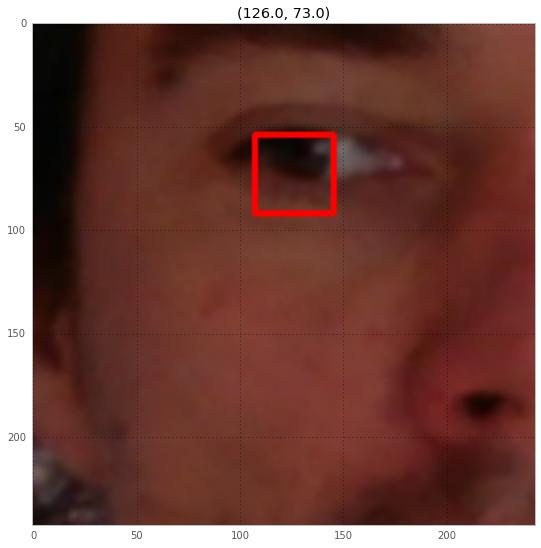

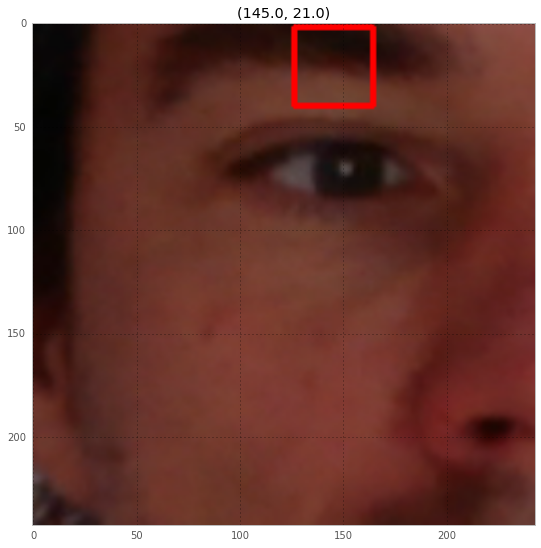

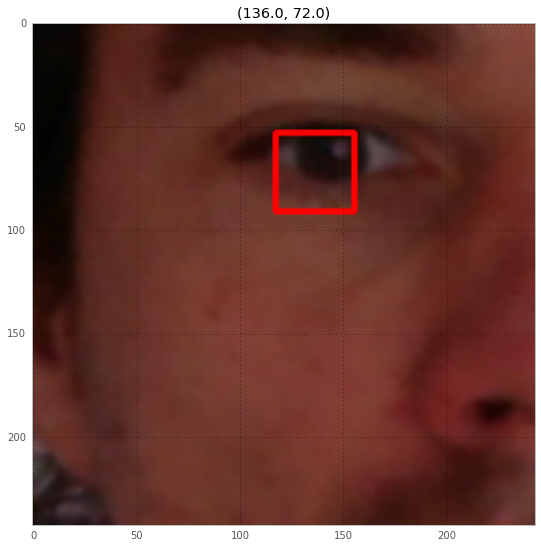

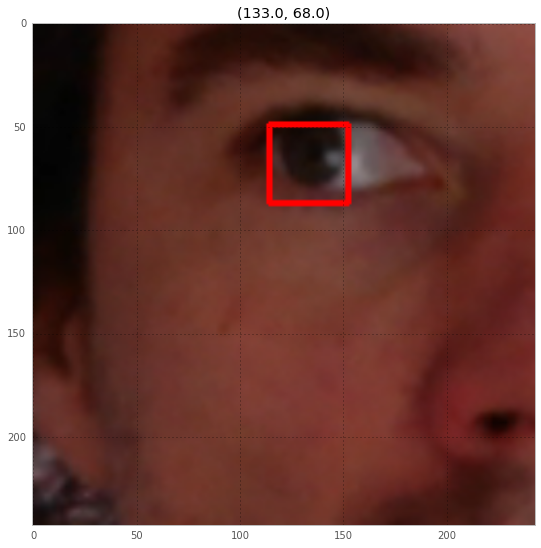

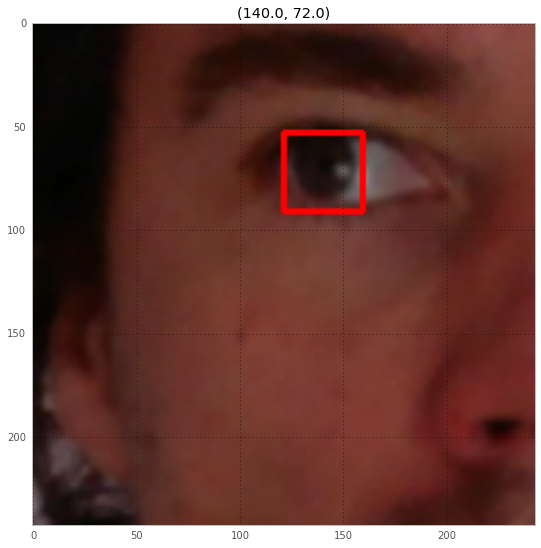

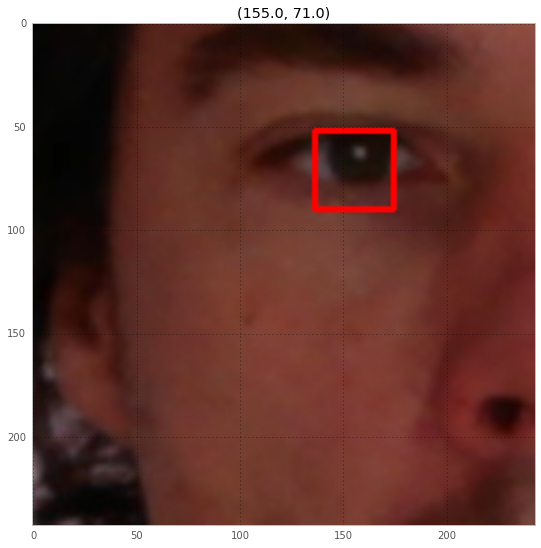

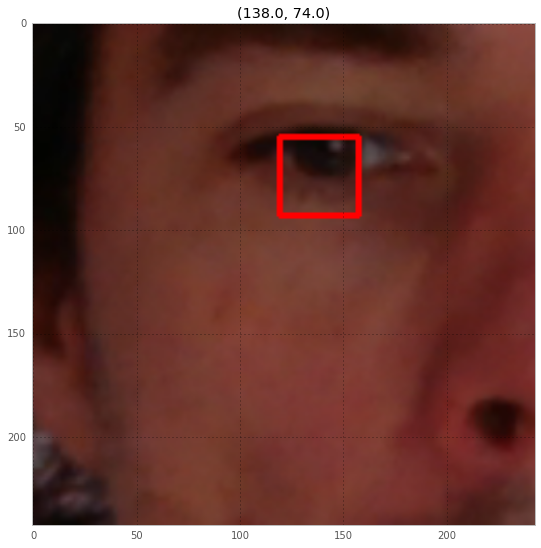

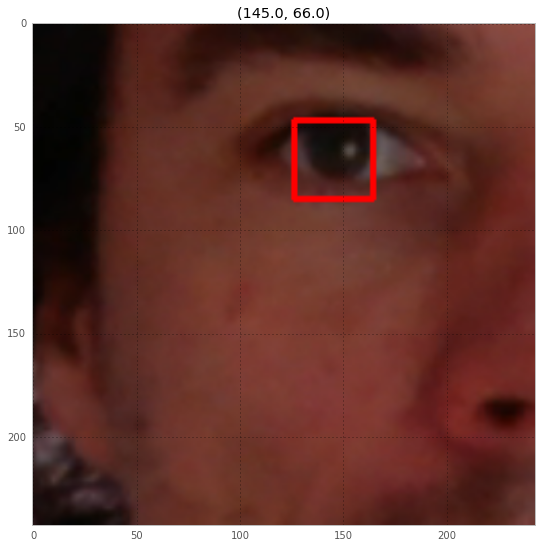

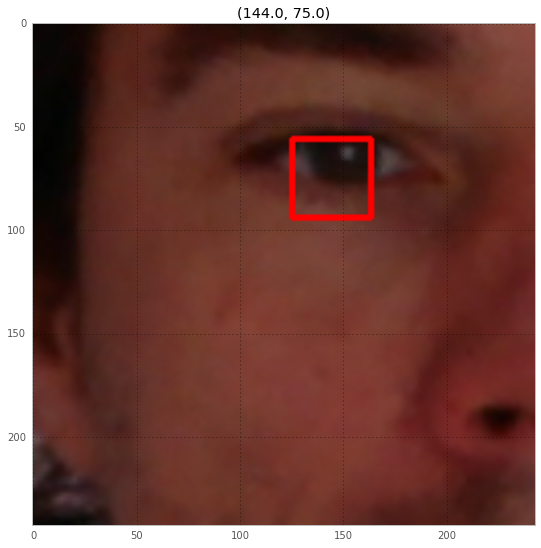

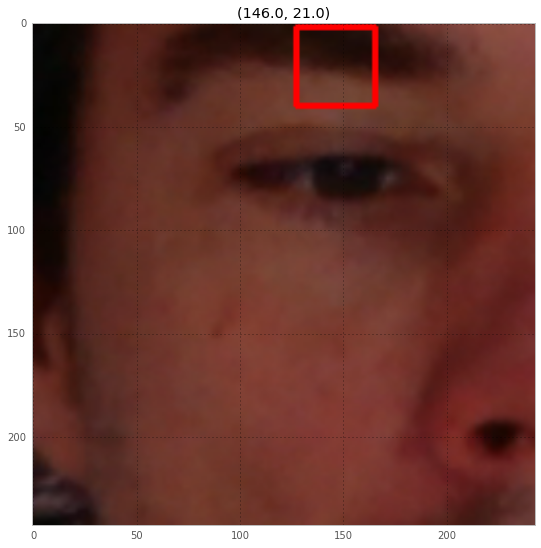

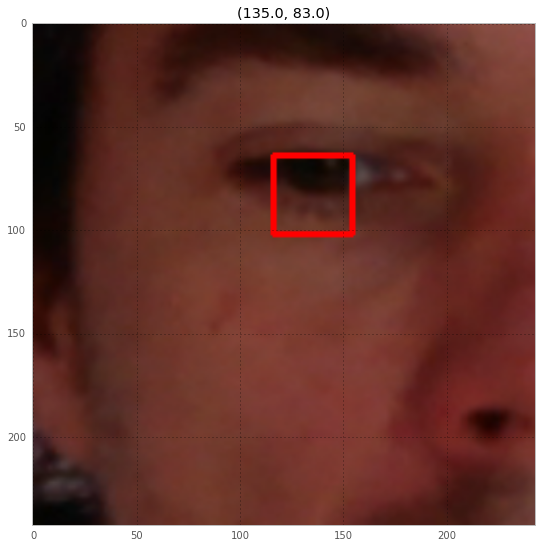

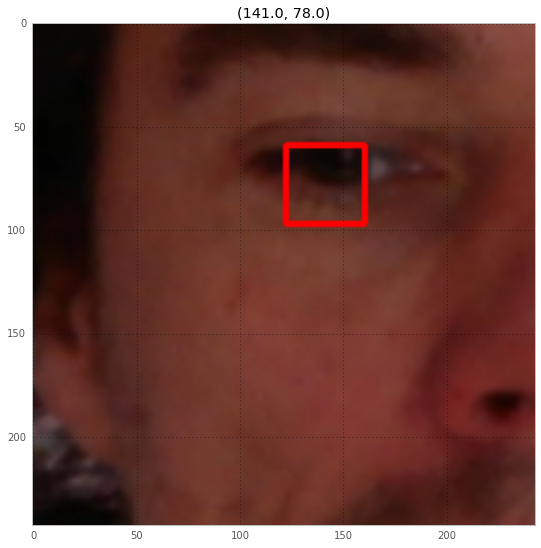

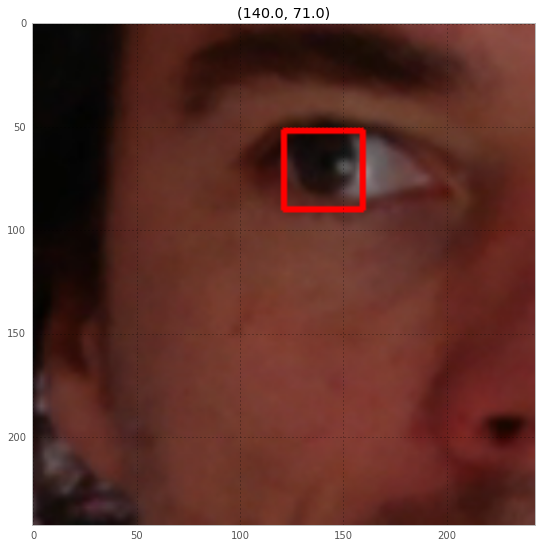

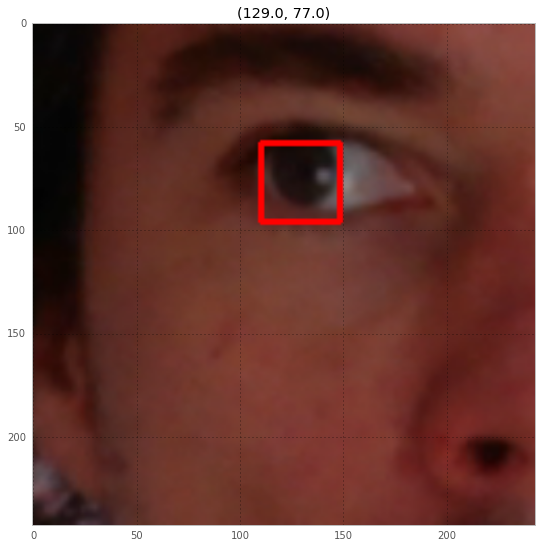

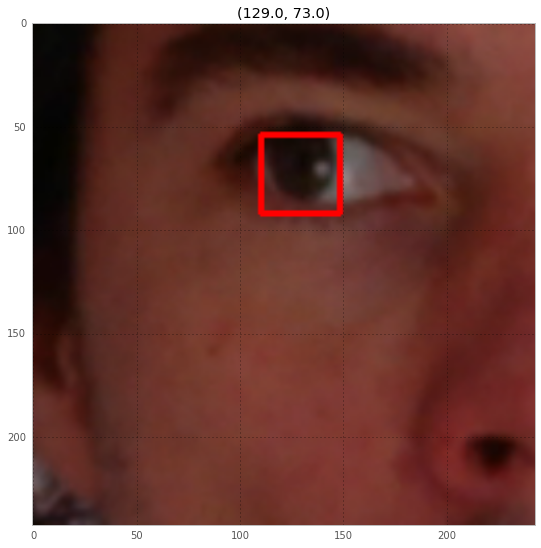

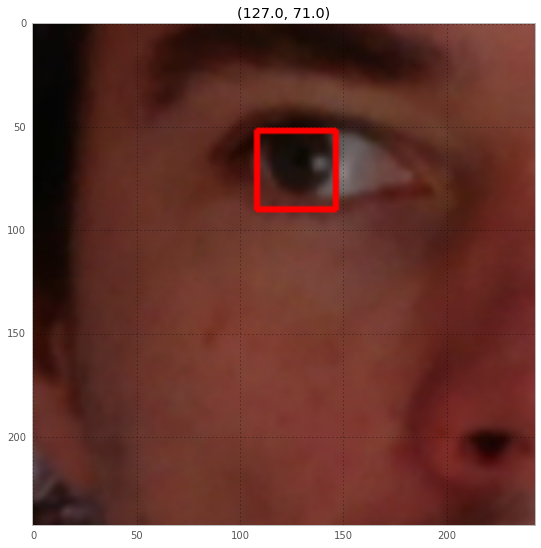

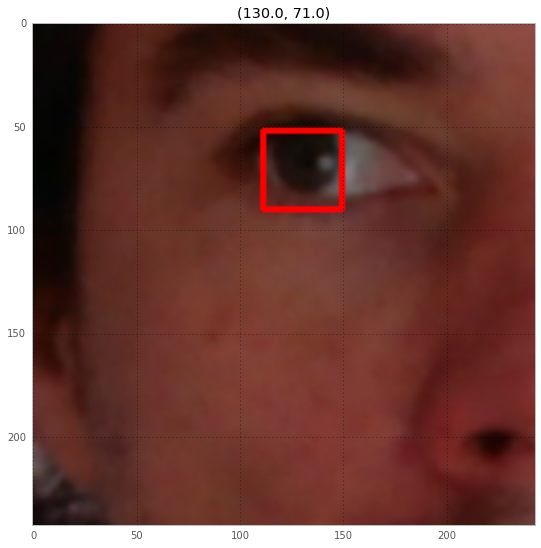

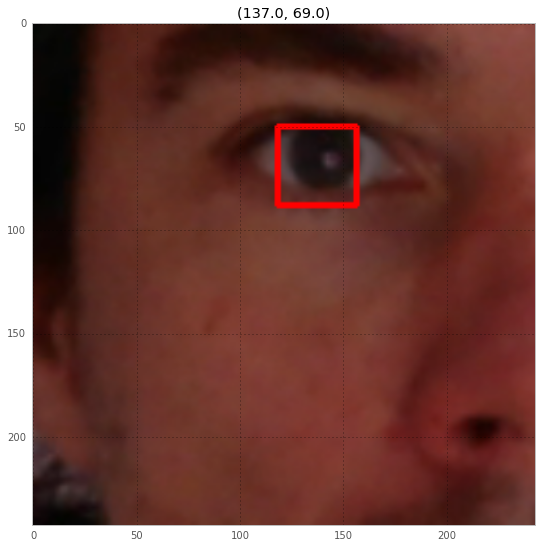

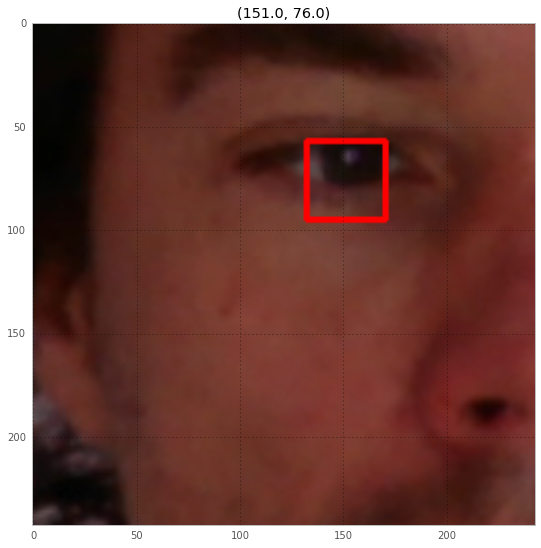

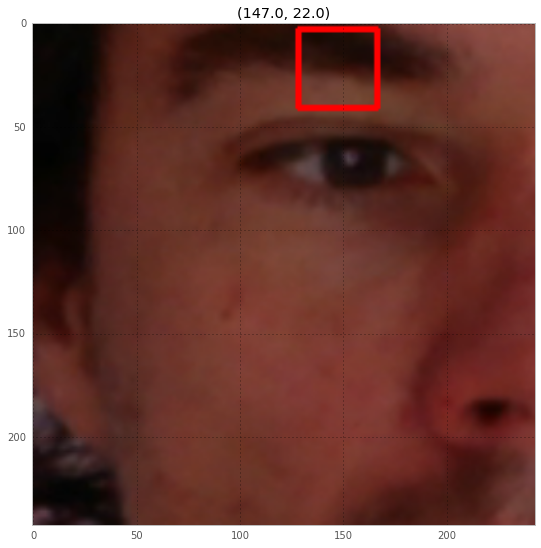

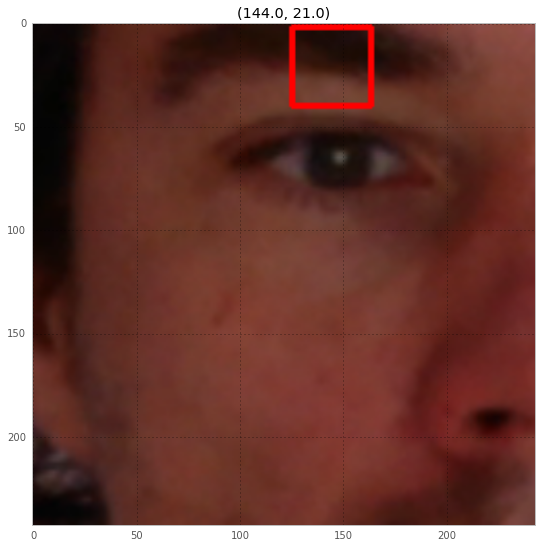

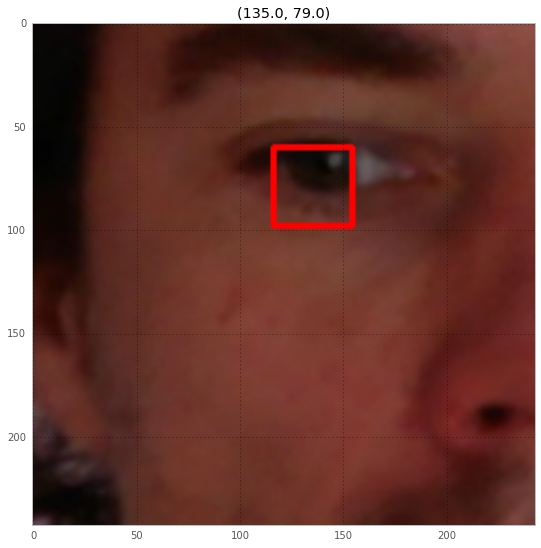

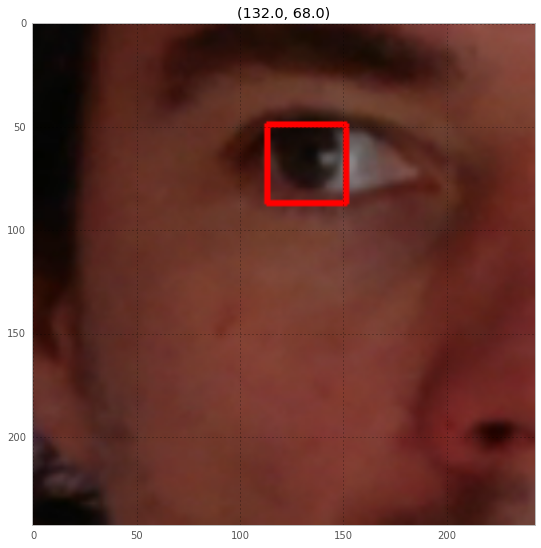

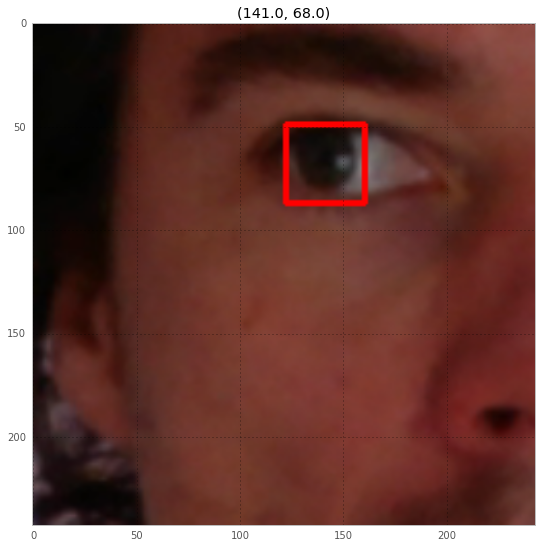

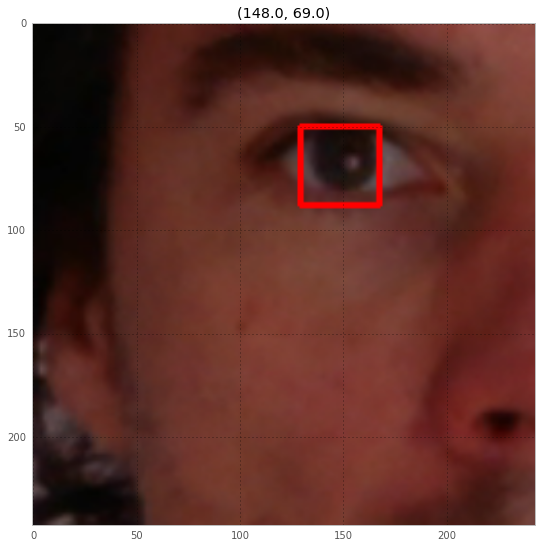

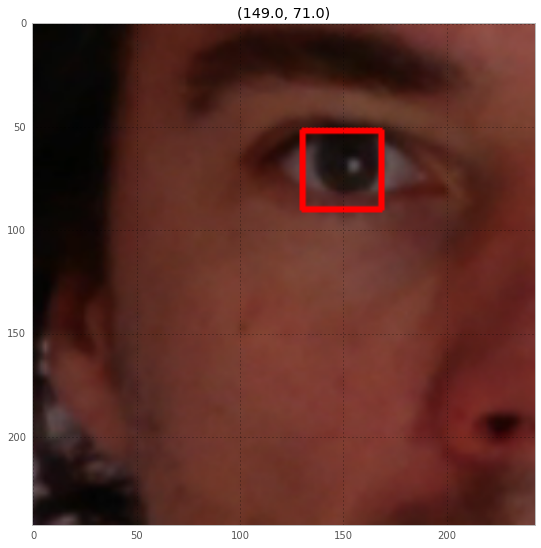

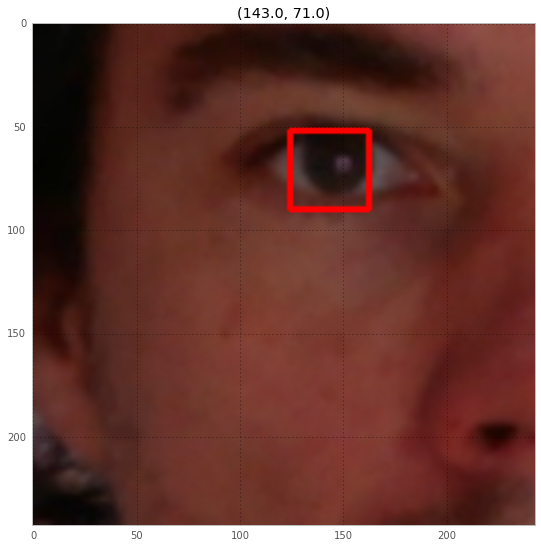

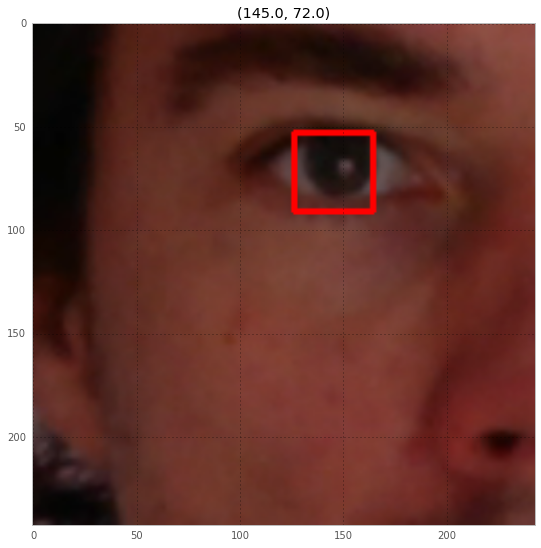

In [61]:
from LeCheapEyeTracker import Client, Server
et = Server()
img_ = movie[:, :, :, 0].copy()

for i_t in range(N_frame):
    img_ = movie[:, :, :, i_t].copy()

    try:
        img_face, res, t0 = et.process_frame(img_, et.clock())
        bottom_right = (int(res[0] + et.wt/2), int(res[1] + et.ht/2))
        top_left = (int(res[0] - et.wt/2), int(res[1] - et.ht/2))

        cv2.rectangle(img_face, top_left, bottom_right, 255, 2)
        fig, axs = plt.subplots(1, 1, figsize=(9, 9))
        axs.imshow(img_face)
        axs.set_title(res)
    except:
        pass
